## Leads Scoring Case Study

### Problem Statement
To select the most promising leads i.e the leads that are most likely to convert into paying customers for
X education company which sells online courses to industry professionals. The company requires us to build a model wherein
we need to assign a lead score to each of the leads such that customers with higher conversion rate have higher lead score. 
A higher lead score would mean it is a "Hot Lead"


In [169]:
# importing required libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [170]:
#Reading the CSV file
leadscore_data = pd.DataFrame(pd.read_csv('Leads.csv'))
leadscore_data.head() 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [171]:
leadscore_data.shape

(9240, 37)

In [172]:
leadscore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [173]:
leadscore_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning and Data Handling

In [174]:
# Handling select which is nothing but equal to null
leadscore_data = leadscore_data.replace('Select', np.nan)

In [175]:
leadscore_data.head()
# we can see  the 'select' variable has been replaced by nan in next step we will handle the null values

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [176]:
leadscore_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [177]:
# Calculating Percentage of null values per column
round(leadscore_data.isnull().sum()/len(leadscore_data)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [178]:
# Droping Columns having more than 30% of missing values

min_count =  int(((100-30)/100)*leadscore_data.shape[0] + 1)

mod_df = leadscore_data.dropna( axis=1,thresh=min_count)


In [179]:

mod_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [180]:
mod_df.shape

(9240, 27)

In [181]:
mod_df.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [182]:
round(mod_df.isnull().sum()/len(mod_df)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [183]:
mod_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [184]:
mod_df.shape

(9240, 27)

In [185]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [186]:
# Now we will handle null values in each column one by one.
# checked the more frequent value for the Lead Score and replacing the NAN values with it
mod_df['Lead Source'].value_counts()


Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
blog                    1
NC_EDM                  1
Pay per Click Ads       1
testone                 1
youtubechannel          1
welearnblog_Home        1
WeLearn                 1
Name: Lead Source, dtype: int64

In [187]:
mod_df['Lead Source']=mod_df['Lead Source'].fillna("Google") 

In [188]:
mod_df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
blog                    1
NC_EDM                  1
Pay per Click Ads       1
testone                 1
youtubechannel          1
welearnblog_Home        1
WeLearn                 1
Name: Lead Source, dtype: int64

In [189]:
round(mod_df.isnull().sum()/len(mod_df)*100,2)#Checking for other missing values

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [190]:
mod_df.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [191]:
 # Simlarly for all the null values in the columns, replacing the NAN with most frequent value

In [192]:
# TotalVisits column

mod_df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [193]:
mod_df['TotalVisits']=mod_df['TotalVisits'].fillna(0.0) 

In [194]:
mod_df['TotalVisits'].value_counts()

0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [195]:
mod_df['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [196]:
mod_df['Page Views Per Visit']=mod_df['Page Views Per Visit'].fillna(0.00) 

In [197]:
mod_df['Page Views Per Visit'].value_counts()

0.00    2326
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [198]:
mod_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [199]:
mod_df['Last Activity']=mod_df['Last Activity'].fillna("Email Opened") 

In [200]:
mod_df['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [201]:
mod_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [202]:
mod_df['What is your current occupation']=mod_df['What is your current occupation'].fillna("Unemployed") 

In [203]:
mod_df['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [204]:
mod_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [205]:
# As there is no much variance we shall drop 'What matters most to you in choosing a course' variable
mod_df = mod_df.drop(['What matters most to you in choosing a course'], axis = 1)

In [206]:
round(mod_df.isnull().sum()/len(mod_df)*100,2)


Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.00
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  0.00
Total Time Spent on Website                  0.00
Page Views Per Visit                         0.00
Last Activity                                0.00
Country                                     26.63
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


In [207]:
# dropping 'Country' column as it is does not add value in determining the target as its an online course
mod_df= mod_df.drop(['Country'], axis=1)


In [209]:
round(mod_df.isnull().sum()/len(mod_df)*100,2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [210]:
# converting binay values to 0 or 1
binary_val = ['Do Not Email' , 'Do Not Call' , 'Search' ,'Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content']

In [211]:
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

mod_df[binary_val] = mod_df[binary_val].apply(binary_map)

In [212]:
mod_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,0,No,No,Modified


In [213]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   int64  
 5   Do Not Call                               9240 non-null   int64  
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Last Activity                       

## EDA

### Univariate Analysis

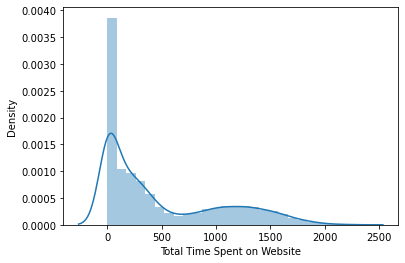

In [214]:

sns.distplot(mod_df['Total Time Spent on Website'])
plt.show()

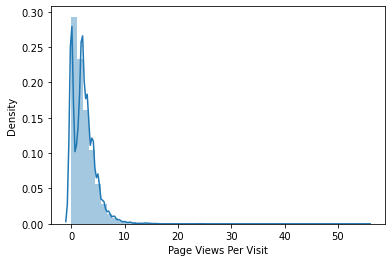

In [215]:
sns.distplot(mod_df['Page Views Per Visit'])
plt.show()

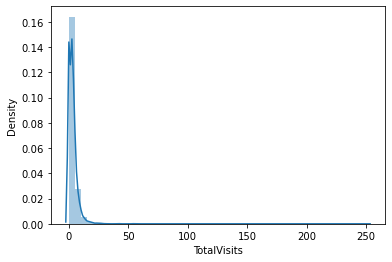

In [216]:
sns.distplot(mod_df['TotalVisits'])
plt.show()

clearly there is no linear relation among the variables

### Bivariate Analysis

<AxesSubplot:xlabel='Lead Origin', ylabel='Converted'>

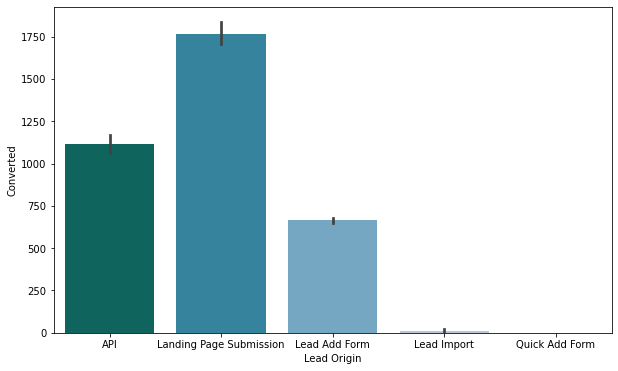

In [217]:
plt.figure(figsize =[10,6])
sns.barplot(y ='Converted', x = 'Lead Origin', palette = 'PuBuGn_r', data = mod_df, estimator = np.sum)

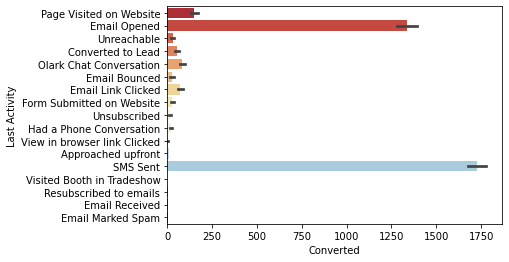

In [218]:

sns.barplot(x ='Converted', y = 'Last Activity', palette = 'RdYlBu', data = mod_df, estimator = np.sum)
plt.show()

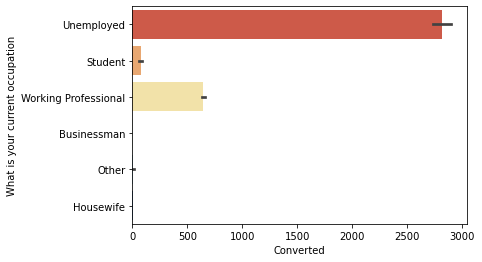

In [219]:

sns.barplot(x ='Converted', y = 'What is your current occupation', palette = 'RdYlBu', data = mod_df, estimator = np.sum)
plt.show()

<Figure size 432x432 with 0 Axes>

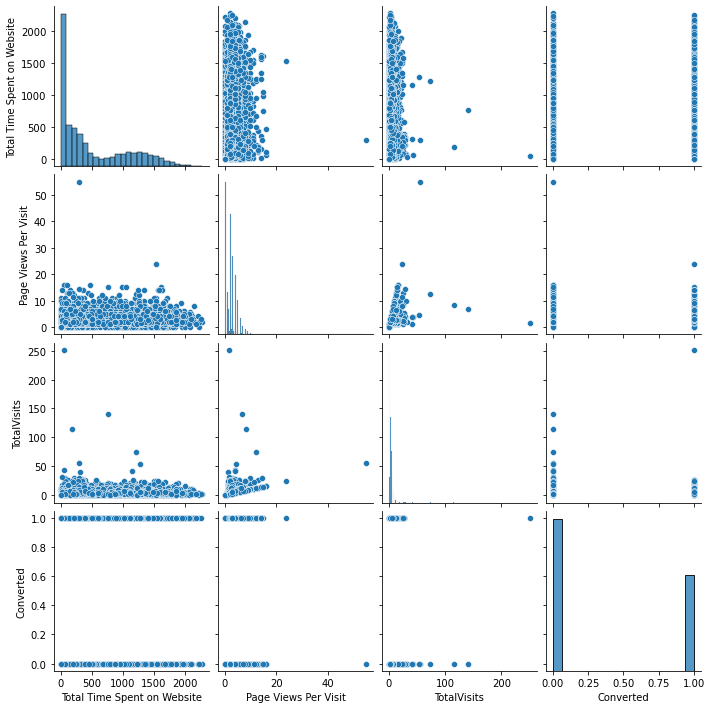

In [220]:
# Bivariate Analysis
plt.figure(figsize = [6,6])
sns.pairplot(mod_df[['Total Time Spent on Website','Page Views Per Visit','TotalVisits','Converted']])
plt.show()

In [221]:
# Creating a dummy variable for categorical variables
dummy_var = pd.get_dummies(mod_df[['Lead Origin','Lead Source','Last Activity','What is your current occupation',
                            'Last Notable Activity']],drop_first=True)
dummy_var.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [222]:
# Concatnating to mod_df dataset
mod_df=pd.concat([mod_df,dummy_var],axis=1)
mod_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,1,0,0,0,0,0,0,0


In [223]:
# Removing columns for the created dummies

mod_df=mod_df.drop(['Lead Origin','Lead Source','Last Activity','What is your current occupation',
            'Last Notable Activity'],1)


In [224]:
mod_df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [225]:
# Converting some categories to numercial 

mod_df[['TotalVisits','Page Views Per Visit']]=mod_df[['TotalVisits','Page Views Per Visit']].astype(int)


In [226]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 80 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Prospect ID                                           9240 non-null   object
 1   Lead Number                                           9240 non-null   int64 
 2   Do Not Email                                          9240 non-null   int64 
 3   Do Not Call                                           9240 non-null   int64 
 4   Converted                                             9240 non-null   int64 
 5   TotalVisits                                           9240 non-null   int32 
 6   Total Time Spent on Website                           9240 non-null   int64 
 7   Page Views Per Visit                                  9240 non-null   int32 
 8   Search                                                9240 non-null 

In [227]:
mod_df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5,674,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2,1532,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1,305,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2,1428,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [228]:
#Dropping few variables that do not add value to our analysis as they are not significant
mod_df=mod_df.drop(['Lead Number','Prospect ID', 'I agree to pay the amount through cheque',
                    'A free copy of Mastering The Interview','TotalVisits','Page Views Per Visit'],1)


In [229]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 74 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Do Not Email                                          9240 non-null   int64
 1   Do Not Call                                           9240 non-null   int64
 2   Converted                                             9240 non-null   int64
 3   Total Time Spent on Website                           9240 non-null   int64
 4   Search                                                9240 non-null   int64
 5   Magazine                                              9240 non-null   int64
 6   Newspaper Article                                     9240 non-null   int64
 7   X Education Forums                                    9240 non-null   int64
 8   Newspaper                                             9240 non-null   int64
 9

## Model Building

In [231]:
# Train-Test Split 


In [232]:
# Assigning dependent variable to 'X'

X=mod_df.drop('Converted',1)

X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,674,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1532,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,305,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1428,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [233]:
# Assiging  target varaible to y

y=mod_df['Converted']     

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [234]:
# Splitting the datset into train and test dataset

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [235]:
# Intializing the object
scaler=StandardScaler() 

In [236]:
# scaling variables using fit_transform

X_train[['Total Time Spent on Website']] = scaler.fit_transform(X_train[['Total Time Spent on Website']])
X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.005716,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0,-0.691418,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0,1.365219,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [237]:
# finding the conversion rate from 'converted' column 
conversion_rate = (sum(mod_df['Converted'])/len(mod_df['Converted'].index))*100
conversion_rate

# we can see that conversion rate is 39%

38.53896103896104

In [238]:
logis=sm.GLM(y_train,(sm.add_constant(X_train)),familt=sm.families.Binomial())# Building the logistic regression model 
logis.fit().summary()# getting the model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6403
Model Family:                Gaussian   Df Model:                           64
Link Function:               identity   Scale:                         0.13686
Method:                          IRLS   Log-Likelihood:                -2713.3
Date:                Wed, 08 Sep 2021   Deviance:                       876.32
Time:                        17:12:56   Pearson chi2:                     876.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7453      0.289      2.580      0.010       0.179       1.311
Do Not Email                                            -0.1255      0.024     -5.152      0.000      -0.173      -0.078
Do Not Call                                              0.4899      0.262      1.869      0.062      -0.024       1.004
Total Time Spent on Website                              0.1835      0.005     35.234      0.000       0.173       0.194
Search                                                   0.0869      0.121      0.716      0.474      -0.151       0.325
Magazine                                             -6.678e-16   2.44e-15     -0.274      0.784   -5.45e-15    4.11e-15
Newspaper Article                                        0.6304      0.371      1.701      0.089      -0.096       1.357
X Education Forums                                      -0.7067      0.611     -1.157      0.247      -1.904       0.491
Newspaper                                               -0.6871      0.370     -1.855      0.064      -1.413       0.039
Digital Advertisement                                   -0.3827      0.262     -1.461      0.144      -0.896       0.131
Through Recommendations                                  0.1415      0.157      0.899      0.369      -0.167       0.450
Receive More Updates About Our Courses                1.418e-15    2.1e-15      0.674      0.500    -2.7e-15    5.54e-15
Update me on Supply Chain Content                     4.092e-15   2.26e-15      1.809      0.070   -3.41e-16    8.52e-15
Get updates on DM Content                            -1.247e-15   2.66e-15     -0.469      0.639   -6.46e-15    3.96e-15
Lead Origin_Landing Page Submission                     -0.0244      0.014     -1.798      0.072      -0.051       0.002
Lead Origin_Lead Add Form                                0.4841      0.071      6.791      0.000       0.344       0.624
Lead Origin_Lead Import                                  0.1792      0.264      0.677      0.498      -0.339       0.698
Lead Origin_Quick Add Form                               0.3410      0.371      0.918      0.359      -0.387       1.069
Lead Source_Direct Traffic                              -0.0146      0.226     -0.065      0.948      -0.457       0.427
Lead Source_Facebook                                    -0.1905      0.347     -0.549      0.583      -0.871       0.490
Lead Source_Google                                       0.0393      0.225      0.175      0.861      -0.402       0.481
Lead Source_Live Chat                                    0.1656      0.338      0.490      0.624      -0.497       0.828
Lead Source_NC_EDM                                       0

In [239]:
# using rfe for feature selection

logreg = LogisticRegression()

rfe = RFE(logreg, 15)           
rfe = rfe.fit(X_train, y_train)


In [240]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [241]:
X_train_1=sm.add_constant(X_train[col])    # Adding constant

### Model 1.

In [242]:
# creating 1st model after RFE

logis1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())

reg1=logis1.fit()

reg1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2698.1
Date:                Wed, 08 Sep 2021   Deviance:                       5396.2
Time:                        17:13:05   Pearson chi2:                 7.11e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0729      0.068      1.071      0.284      -0.060       0.206
Do Not Email                                            -1.2466      0.195     -6.387      0.000      -1.629      -0.864
Total Time Spent on Website                              1.1002      0.039     27.997      0.000       1.023       1.177
Lead Origin_Lead Add Form                                3.7950      0.191     19.905      0.000       3.421       4.169
Lead Source_Olark Chat                                   1.1718      0.102     11.457      0.000       0.971       1.372
Lead Source_Welingak Website                             1.9692      0.744      2.647      0.008       0.511       3.427
Last Activity_Email Bounced                             -1.0898      0.347     -3.139      0.002      -1.770      -0.409
Last Activity_Olark Chat Conversation                   -1.0933      0.192     -5.692      0.000      -1.470      -0.717
What is your current occupation_Housewife               22.9736   1.37e+04      0.002      0.999   -2.68e+04    2.69e+04
What is your current occupation_Working Professional     2.7611      0.187     14.792      0.000       2.395       3.127
Last Notable Activity_Email Link Clicked                -1.9010      0.272     -6.982      0.000      -2.435      -1.367
Last Notable Activity_Email Opened                      -1.3147      0.087    -15.160      0.000      -1.485      -1.145
Last Notable Activity_Had a Phone Conversation           2.1462      1.099      1.952      0.051      -0.008       4.301
Last Notable Activity_Modified                          -1.8200      0.096    -19.049      0.000      -2.007      -1.633
Last Notable Activity_Olark Chat Conversation           -1.5720      0.373     -4.218      0.000      -2.302      -0.842
Last Notable Activity_Page Visited on Website           -1.5801      0.191     -8.254      0.000      -1.955      -1.205
========================================================================================================================
"""

In [243]:
# What is your current occupation_Housewife is having high p-value will check vif and possibly delete this variable
# Calculating VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_1[col].values, i) for i in range(X_train_1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.91
0,Do Not Email,1.80
5,Last Activity_Email Bounced,1.79
3,Lead Source_Olark Chat,1.66
12,Last Notable Activity_Modified,1.55
2,Lead Origin_Lead Add Form,1.41
13,Last Notable Activity_Olark Chat Conversation,1.30
4,Lead Source_Welingak Website,1.24
1,Total Time Spent on Website,1.20
8,What is your current occupation_Working Profes...,1.14


 As we can see vif for all the variables is below 5 there is no multicollinearity

In [244]:
# Dropping What is your current occupation_Housewife' as it is  having high p-value 

X_train2=X_train_1.drop(['What is your current occupation_Housewife'],axis=1)

### Model 2

In [245]:
# Creating a new model

X_train2=sm.add_constant(X_train2)                              
logis2=sm.GLM(y_train,X_train2,families=sm.families.Binomial())  
reg2=logis2.fit()                                               
reg2.summary()                                                                                         

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.13905
Method:                          IRLS   Log-Likelihood:                -2789.7
Date:                Wed, 08 Sep 2021   Deviance:                       897.26
Time:                        17:13:05   Pearson chi2:                     897.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4986      0.010     48.322      0.000       0.478       0.519
Do Not Email                                            -0.1507      0.023     -6.646      0.000      -0.195      -0.106
Total Time Spent on Website                              0.1879      0.005     36.249      0.000       0.178       0.198
Lead Origin_Lead Add Form                                0.5593      0.020     28.110      0.000       0.520       0.598
Lead Source_Olark Chat                                   0.1697      0.014     12.021      0.000       0.142       0.197
Lead Source_Welingak Website                             0.1937      0.043      4.456      0.000       0.109       0.279
Last Activity_Email Bounced                             -0.0598      0.033     -1.836      0.066      -0.124       0.004
Last Activity_Olark Chat Conversation                   -0.1263      0.020     -6.293      0.000      -0.166      -0.087
What is your current occupation_Working Professional     0.3445      0.018     19.032      0.000       0.309       0.380
Last Notable Activity_Email Link Clicked                -0.3059      0.036     -8.585      0.000      -0.376      -0.236
Last Notable Activity_Email Opened                      -0.2215      0.013    -17.341      0.000      -0.247      -0.196
Last Notable Activity_Had a Phone Conversation           0.2408      0.113      2.134      0.033       0.020       0.462
Last Notable Activity_Modified                          -0.2961      0.013    -22.814      0.000      -0.322      -0.271
Last Notable Activity_Olark Chat Conversation           -0.2799      0.040     -7.036      0.000      -0.358      -0.202
Last Notable Activity_Page Visited on Website           -0.2684      0.026    -10.205      0.000      -0.320      -0.217
========================================================================================================================
"""

In [246]:
# checking the vif values
vif = pd.DataFrame()
X_train_final=X_train2.drop('const',1)     # removing constant 
vif['Features'] = X_train_final.columns
vif['VIF'] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.91
0,Do Not Email,1.80
5,Last Activity_Email Bounced,1.79
3,Lead Source_Olark Chat,1.66
11,Last Notable Activity_Modified,1.55
2,Lead Origin_Lead Add Form,1.41
12,Last Notable Activity_Olark Chat Conversation,1.30
4,Lead Source_Welingak Website,1.23
1,Total Time Spent on Website,1.20
7,What is your current occupation_Working Profes...,1.14


From the above vif values we can confirm that there is no multi-collinearity between the variables

In [247]:
# Last Activity_Email Bounced has a high p value  hence dropping it 
X_train3=X_train2.drop(['Last Activity_Email Bounced'],axis=1)

### Model 3

In [248]:
# Creating a new model

X_train3=sm.add_constant(X_train3)                              
logis3=sm.GLM(y_train,X_train3,families=sm.families.Binomial())  
reg3=logis3.fit()                                               
reg3.summary()                                                                                         

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.13910
Method:                          IRLS   Log-Likelihood:                -2791.3
Date:                Wed, 08 Sep 2021   Deviance:                       897.73
Time:                        17:13:06   Pearson chi2:                     898.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4998      0.010     48.524      0.000       0.480       0.520
Do Not Email                                            -0.1765      0.018     -9.906      0.000      -0.211      -0.142
Total Time Spent on Website                              0.1877      0.005     36.208      0.000       0.178       0.198
Lead Origin_Lead Add Form                                0.5592      0.020     28.102      0.000       0.520       0.598
Lead Source_Olark Chat                                   0.1687      0.014     11.959      0.000       0.141       0.196
Lead Source_Welingak Website                             0.1951      0.043      4.487      0.000       0.110       0.280
Last Activity_Olark Chat Conversation                   -0.1225      0.020     -6.135      0.000      -0.162      -0.083
What is your current occupation_Working Professional     0.3447      0.018     19.040      0.000       0.309       0.380
Last Notable Activity_Email Link Clicked                -0.3067      0.036     -8.606      0.000      -0.377      -0.237
Last Notable Activity_Email Opened                      -0.2225      0.013    -17.429      0.000      -0.247      -0.197
Last Notable Activity_Had a Phone Conversation           0.2398      0.113      2.124      0.034       0.019       0.461
Last Notable Activity_Modified                          -0.2996      0.013    -23.342      0.000      -0.325      -0.274
Last Notable Activity_Olark Chat Conversation           -0.2831      0.040     -7.122      0.000      -0.361      -0.205
Last Notable Activity_Page Visited on Website           -0.2657      0.026    -10.117      0.000      -0.317      -0.214
========================================================================================================================
"""

In [249]:
# checking the vif values
vif = pd.DataFrame()
X_train_final=X_train3.drop('const',1)     # removing constant 
vif['Features'] = X_train_final.columns
vif['VIF'] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Olark Chat Conversation,1.89
3,Lead Source_Olark Chat,1.65
10,Last Notable Activity_Modified,1.51
2,Lead Origin_Lead Add Form,1.41
11,Last Notable Activity_Olark Chat Conversation,1.30
4,Lead Source_Welingak Website,1.23
1,Total Time Spent on Website,1.20
6,What is your current occupation_Working Profes...,1.14
0,Do Not Email,1.11
8,Last Notable Activity_Email Opened,1.10


## Predecting the model

In [250]:
y_train_pred=reg3.predict(X_train3)

In [306]:
# Saving the predicted values in a new dataset

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_Prob':y_train_pred})

y_train_pred_final.head()   

,Converted,Converted_Prob
1871,0,0.279788
6795,0,0.278348
3516,0,0.316193
8105,0,0.756002
3934,0,0.202647


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [252]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [255]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

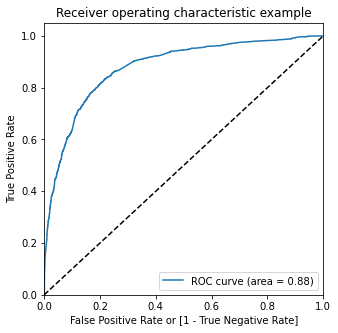

In [256]:
draw_roc( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

From the ROC curve we can conclude that:
   - 1. Model is more towards upper left corner, therefore we can say the model is good
   - 2. The area under the curver is 88 %

In [258]:
# labeling the prospect id
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,prediction for 0.5,Prospect ID
0,0,0.279788,0,1871
1,0,0.278348,0,6795
2,0,0.316193,0,3516
3,0,0.756002,1,8105
4,0,0.202647,0,3934


In [259]:
#creating a new column for converted probability(0.5)
y_train_pred_final['prediction for 0.5'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [260]:
y_train_pred_final.head()

,Converted,Converted_Prob,prediction for 0.5,Prospect ID
0,0,0.279788,0,1871
1,0,0.278348,0,6795
2,0,0.316193,0,3516
3,0,0.756002,1,8105
4,0,0.202647,0,3934


In [261]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,prediction for 0.5,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.279788,0,1871,1,1,1,0,0,0,0,0,0,0
1,0,0.278348,0,6795,1,1,1,0,0,0,0,0,0,0
2,0,0.316193,0,3516,1,1,1,1,0,0,0,0,0,0
3,0,0.756002,1,8105,1,1,1,1,1,1,1,1,0,0
4,0,0.202647,0,3934,1,1,1,0,0,0,0,0,0,0


### Calculating  'Accuracy', 'Sensitivity' and 'Specificity' for each points. This helps us in taking the proper cutoff 

In [262]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.423469     0.996756     0.070215
0.1   0.1  0.555968     0.975669     0.297351
0.2   0.2  0.699134     0.935929     0.553223
0.3   0.3  0.791744     0.862530     0.748126
0.4   0.4  0.809215     0.791160     0.820340
0.5   0.5  0.810761     0.682887     0.889555
0.6   0.6  0.780458     0.517843     0.942279
0.7   0.7  0.749845     0.391727     0.970515
0.8   0.8  0.719233     0.289132     0.984258
0.9   0.9  0.681200     0.171938     0.995002


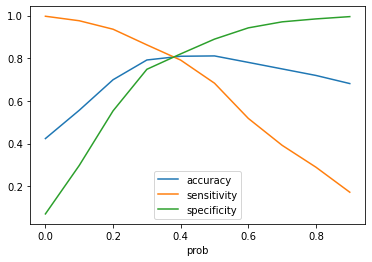

In [263]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

 From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [264]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,prediction for 0.5,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.279788,0,1871,1,1,1,0,0,0,0,0,0,0,0
1,0,0.278348,0,6795,1,1,1,0,0,0,0,0,0,0,0
2,0,0.316193,0,3516,1,1,1,1,0,0,0,0,0,0,0
3,0,0.756002,1,8105,1,1,1,1,1,1,1,1,0,0,1
4,0,0.202647,0,3934,1,1,1,0,0,0,0,0,0,0,0


In [265]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8092145949288806

##  Precision and Recall

In [266]:
# Creating confusion matrix to find precision and recall score

confusion_final=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
confusion_final

array([[3283,  719],
       [ 515, 1951]], dtype=int64)

In [267]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

In [268]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7911597729115978

In [269]:
# Let us calculate specificity
TN / float(TN+FP)

0.8203398300849575

In [270]:
# Calculate false postive rate - predicting converted when customer has not have converted
print(FP/ float(TN+FP))

0.17966016991504247


In [271]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7307116104868914


In [272]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8644023170089521


In [273]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7307116104868914

In [274]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7911597729115978

### Precision and Recall trade-off


 Precision and Recall are inversely related means if one increases other will genuinely decrease. Hence we need to see the trade off between these two

In [276]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

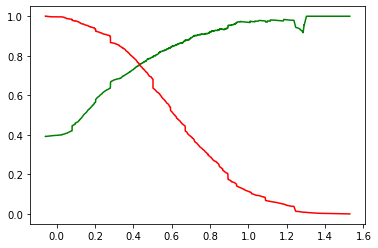

In [277]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

 There seems to be trade off between Precision and Recall and the meeting point is nearly at 0.5

###  Prediction of the test dataset


In [278]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X - test dataset

X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

In [279]:
test_cols=X_train2.columns[1:]              
X_test_final=X_test[test_cols]              
X_test_final=sm.add_constant(X_test_final)  
y_pred_test=reg2.predict(X_test_final)       

In [280]:
X_test_sm = sm.add_constant(X_test)# adding constant

In [281]:
#Making predictions on the test set
y_test_pred = reg2.predict(X_test_final)
y_test_pred[:10]

4269    0.679826
2376    0.891442
7766    0.696961
9199    0.079444
4359    0.669935
9186    0.542622
1631    0.459006
8963    0.202824
8007    0.154388
5324    0.387193
dtype: float64

In [282]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
4269,0.679826
2376,0.891442
7766,0.696961
9199,0.079444
4359,0.669935


In [283]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)


In [284]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [285]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [287]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.679826
1,1,2376,0.891442
2,1,7766,0.696961
3,0,9199,0.079444
4,1,4359,0.669935


In [288]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,1,4269,0.679826
1,1,2376,0.891442
2,1,7766,0.696961
3,0,9199,0.079444
4,1,4359,0.669935


In [289]:
# using the same cut-off from the train data
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.40 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,final_predicted
0,1,4269,0.679826,1
1,1,2376,0.891442,1
2,1,7766,0.696961,1
3,0,9199,0.079444,0
4,1,4359,0.669935,1


In [290]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8138528138528138

In [291]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1395,  282],
       [ 234,  861]], dtype=int64)

In [292]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [293]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7863013698630137

In [294]:
# Let us calculate specificity
TN / float(TN+FP)

0.8318425760286225

## Assigning Lead score for each lead in the entire dataset

In [295]:
#getting the test dataset along with conversion probablities 
leads_test_pred = y_pred_final
leads_test_pred.head()

,Converted,Prospect ID,Converted_Prob,final_predicted
0,1,4269,0.679826,1
1,1,2376,0.891442,1
2,1,7766,0.696961,1
3,0,9199,0.079444,0
4,1,4359,0.669935,1


In [296]:
#getting the train dataset along with conversion probablities 
leads_train_pred = y_train_pred_final
leads_train_pred.head()

,Converted,Converted_Prob,prediction for 0.5,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.279788,0,1871,1,1,1,0,0,0,0,0,0,0,0
1,0,0.278348,0,6795,1,1,1,0,0,0,0,0,0,0,0
2,0,0.316193,0,3516,1,1,1,1,0,0,0,0,0,0,0
3,0,0.756002,1,8105,1,1,1,1,1,1,1,1,0,0,1
4,0,0.202647,0,3934,1,1,1,0,0,0,0,0,0,0,0


In [297]:
#dropping unwanted variables from train data
leads_train_pred = leads_train_pred[['Converted','Prospect ID','Converted_Prob','final_predicted']] 
leads_train_pred.head()

,Converted,Prospect ID,Converted_Prob,final_predicted
0,0,1871,0.279788,0
1,0,6795,0.278348,0
2,0,3516,0.316193,0
3,0,8105,0.756002,1
4,0,3934,0.202647,0


In [304]:
# concatenating the train and test data set with conversion probablities
leads_score_final = leads_train_pred.append(leads_test_pred)
leads_score_final.head(10)

,Converted,Prospect ID,Converted_Prob,final_predicted
0,0,1871,0.279788,0
1,0,6795,0.278348,0
2,0,3516,0.316193,0
3,0,8105,0.756002,1
4,0,3934,0.202647,0
5,1,4844,1.194117,1
6,0,3297,0.140285,0
7,1,8071,1.054970,1
8,0,987,0.313855,0
9,1,7423,0.870368,1


In [299]:
# inspecting the shape of the train, test, and the final concatenated dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(leads_score_final.shape)


(6468, 4)
(2772, 4)
(9240, 4)


In [300]:
#ensuring the Prospect ID is unique
len(leads_score_final['Prospect ID'].unique().tolist())

9240

In [307]:
# Calculating the lead score value 
# Lead score = 100*Converted_Prob
leads_score_final['Lead_score'] = leads_score_final['Converted_Prob'].apply(lambda x: round(x*100))
leads_score_final.head()

,Converted,Prospect ID,Converted_Prob,final_predicted,Lead_score
0,0,1871,0.279788,0,28
1,0,6795,0.278348,0,28
2,0,3516,0.316193,0,32
3,0,8105,0.756002,1,76
4,0,3934,0.202647,0,20


In [302]:
# inspecting if the final dataframe has any null values
leads_score_final.isnull().sum()

Converted          0
Prospect ID        0
Converted_Prob     0
final_predicted    0
Lead_score         0
dtype: int64

## Conclusion


- 1.The Accuracy, Precision and Recall score we got from test-train set acceptable in range
- 2.We have high recall score than precision score which we were exactly looking for.
- 3.In business terms, this model has an ability to adjust with the company’s requirements in coming future.
- 4.This concludes that the model is in stable state.
- 5.Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
  - Lead Origin_Lead Add Form and
  - What is your current occupation_Working Professional
  - Last Notable Activity_Had a Phone Conversation